**Desafio 1**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats 

In [2]:
df = pd.read_csv('nations.csv', encoding='iso-8859-1')

In [3]:
df

,Unnamed: 0,country,region,gdp,school,adfert,chldmort,life,pop,urban,femlab,literacy,co2,gini
0,1,Algeria,Africa,7300.399902,6.716667,7.300000,34.75,72.316666,34172236,64.933334,0.4522,72.599998,15.00,NaN
1,2,Benin,Africa,1338.800049,3.100000,111.699997,122.75,54.733334,8237634,41.000000,0.8482,41.700001,1.20,NaN
2,3,Botswana,Africa,12307.400391,8.600000,52.099998,60.25,52.250000,1941233,59.250000,0.8870,84.099998,9.20,NaN
3,4,Burkina Faso,Africa,1063.400024,1.300000,124.800003,170.50,53.783333,15308383,23.583334,0.8584,23.600000,0.20,NaN
4,5,Burundi,Africa,349.200012,2.483333,18.600000,168.50,48.866665,7821783,10.250000,1.0344,66.599998,0.10,33.299999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
189,190,Samoa,Oceania,4012.600098,10.300000,28.299999,26.75,71.533333,181600,20.666668,0.5010,98.800003,3.10,NaN
190,191,Solomon Islands,Oceania,2249.199951,4.500000,70.300003,36.00,66.500000,503617,17.766666,0.4858,NaN,1.40,NaN
191,192,Tonga,Oceania,4072.199951,10.133333,22.299999,19.25,71.833336,102550,23.266666,0.7150,99.000000,4.85,NaN
192,193,Tuvalu,Oceania,NaN,NaN,23.299999,36.50,66.033333,9767,49.233334,NaN,NaN,NaN,NaN


In [4]:
df_new = df.loc[:,['region','femlab', 'literacy', 'school']]
df_new

,region,femlab,literacy,school
0,Africa,0.4522,72.599998,6.716667
1,Africa,0.8482,41.700001,3.100000
2,Africa,0.8870,84.099998,8.600000
3,Africa,0.8584,23.600000,1.300000
4,Africa,1.0344,66.599998,2.483333
...,...,...,...,...
189,Oceania,0.5010,98.800003,10.300000
190,Oceania,0.4858,NaN,4.500000
191,Oceania,0.7150,99.000000,10.133333
192,Oceania,NaN,NaN,NaN


**Desafio 2**

In [5]:
def binarize_histogram(dataframe, variable):
    tmp = dataframe
    tmp['binarize'] = np.where(tmp[variable] > np.mean(tmp[variable]), 1,
    0)
    hist_1 = tmp[tmp['binarize'] == 1][variable].dropna()
    hist_0 = tmp[tmp['binarize'] == 0][variable].dropna()
    i=0
    for data in [hist_0, hist_1]:
        plt.subplot(1, 2, i+1)
        sns.distplot(data)
        plt.axvline(np.mean(data), color='tomato')
        if i==0:
            plt.title("{0} <= {1}".format(variable, round(np.mean(tmp[variable]), 3)))
        else:
            plt.title("{0} >= {1}".format(variable, round(np.mean(tmp[variable]), 3)))
        i+=1

/home/seba/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/seba/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


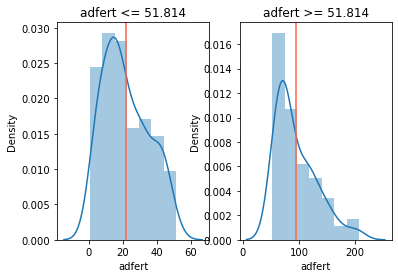

In [6]:
binarize_histogram(df, 'adfert')

Se observa que el grafico de densidad de probabilidad es similar en ambos.

/home/seba/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/seba/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


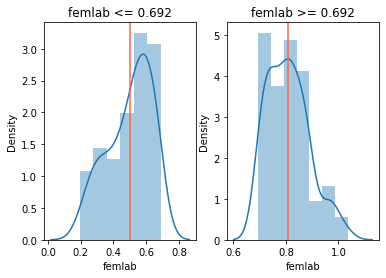

In [7]:
binarize_histogram(df, 'femlab')

Se observa que los datos que son menores a 0.692 (promedio de femlab), tienen mayor cantidad de datos menores al promedio de esta sub muestra. 

/home/seba/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/seba/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


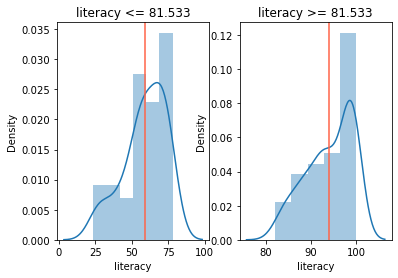

In [8]:
binarize_histogram(df, 'literacy')

/home/seba/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/seba/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


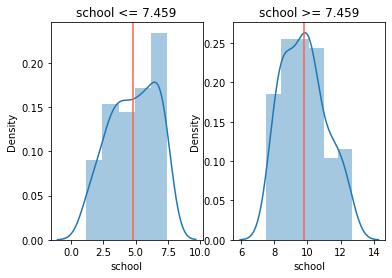

In [9]:
binarize_histogram(df, 'school')

***Boxplots***

Uso 'adfert' para comparar el resultado de la funcion antes y despues de refactorizarla.

In [10]:
def grouped_boxplot(dataframe, variable, group_by):
    plt.rcParams["figure.figsize"]=(8,6)
    plt.style.use('seaborn')
    sns.boxplot(x=group_by, y=variable, data=dataframe)
    return

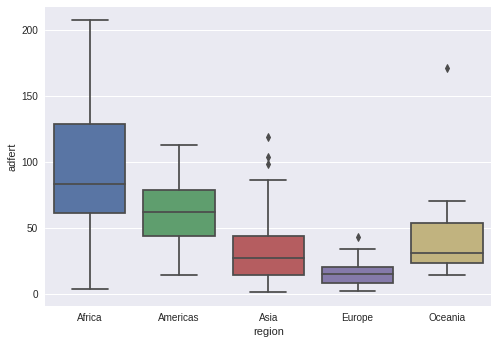

In [11]:
grouped_boxplot(df, 'adfert', 'region')

En africa y Oceania, los valores mas altos se concentran entre la mediana y el 3er Cuartil.

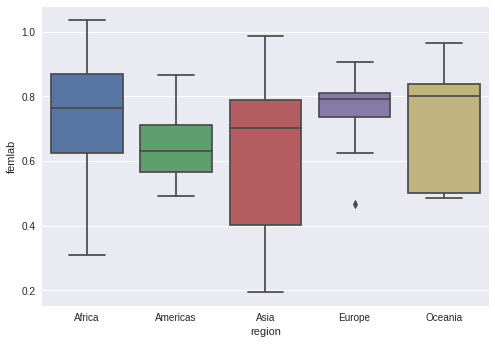

In [12]:
grouped_boxplot(df_new, 'femlab', 'region')

En asia y Oceania, se observa que entre la mediana y el 1er cuartil se encuentra los valores mas bajos.

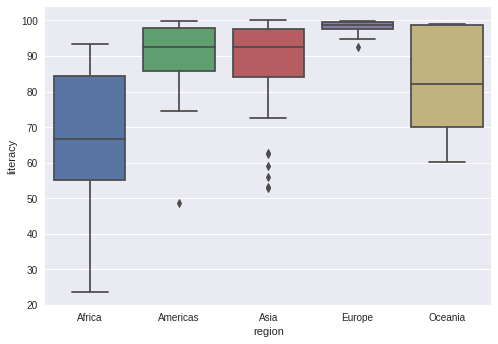

In [13]:
grouped_boxplot(df_new, 'literacy', 'region')

En Europa, se observa que la diferencia intercuartil es muy baja, por ende los valores estan mas concentrados.

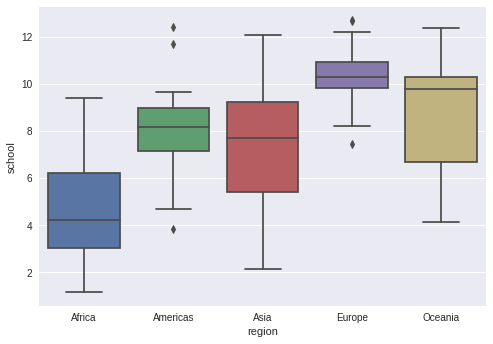

In [14]:
grouped_boxplot(df_new, 'school', 'region')

Se observa que en Oceania los valores mas bajos se encuentran entre el 1er cuartil y la mediana, y son mas variados.

***Scatterplot***

In [15]:
def grouped_scatterplot(dataframe, x, y, group_by):
    fig, axes = plt.subplots(1,5, sharey=True, figsize = (16,8))
    i = 0
    for group in df[group_by].unique():
        axes[i].set_title(group)
        sns.scatterplot(ax=axes[i], data= dataframe, x=dataframe[dataframe[group_by]==group][x], y= y)
        i+=1
       
    return

Uso 'adfert' para comparar el resultado de la funcion antes y despues de refactorizarla.

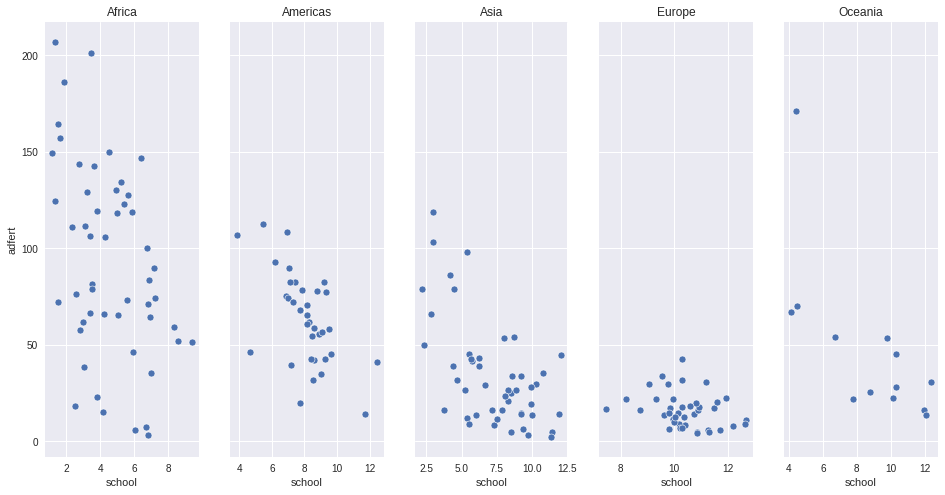

In [16]:
grouped_scatterplot(df,'school', 'adfert','region')

Se observa que los paises de Europa tiene menor fertilidad adolencente con valores mas concentrados.

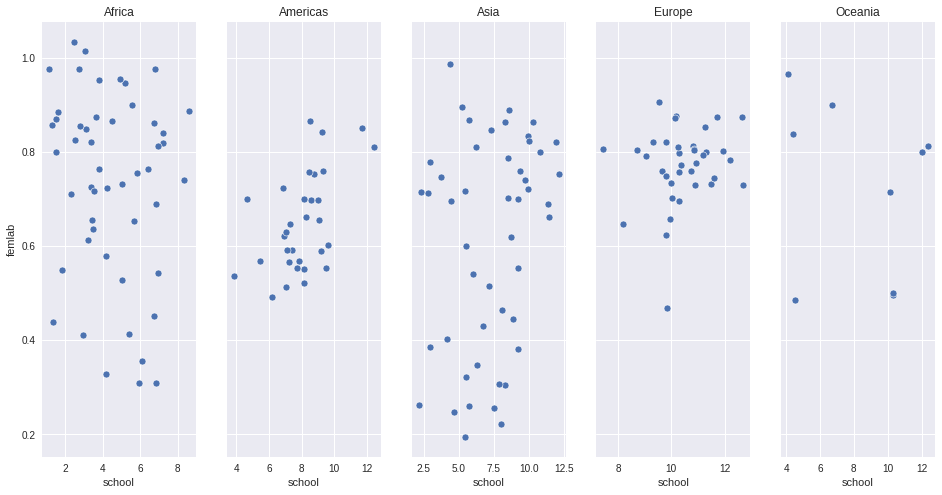

In [17]:
grouped_scatterplot(df_new, 'school', 'femlab', 'region')

Se observa una gran dispersion en los datos, lo que podria significar que la correlacion entre ambas variables es baja.

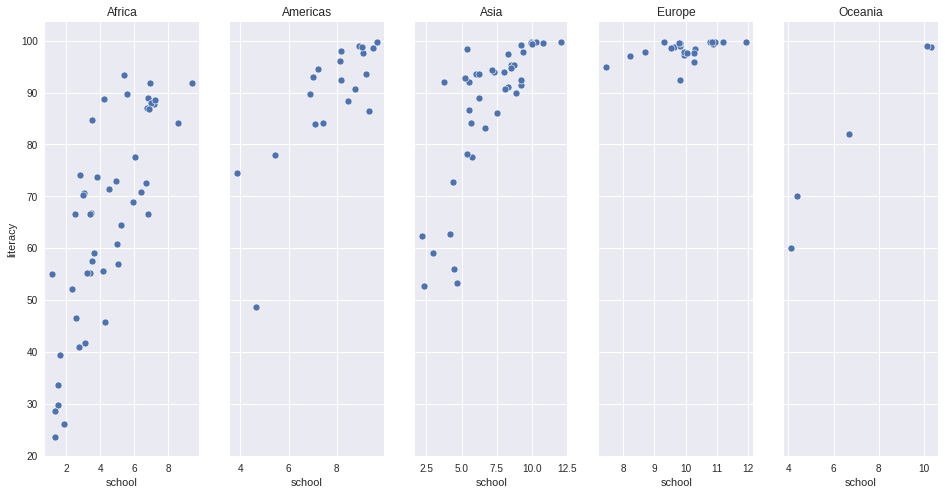

In [18]:
grouped_scatterplot(df_new, 'school', 'literacy', 'region')

Se observa una mayor concentracion de los datos de Europa entre 90 y 100, comparado con el resto de regiones, donde los valores son mas dispersos.

**Desafio 3**

In [19]:
df_corr = df.loc[:,['femlab', 'literacy', 'school']]

In [20]:
df_corr

,femlab,literacy,school
0,0.4522,72.599998,6.716667
1,0.8482,41.700001,3.100000
2,0.8870,84.099998,8.600000
3,0.8584,23.600000,1.300000
4,1.0344,66.599998,2.483333
...,...,...,...
189,0.5010,98.800003,10.300000
190,0.4858,NaN,4.500000
191,0.7150,99.000000,10.133333
192,NaN,NaN,NaN


In [21]:
correlacion = df_corr.corr()

<AxesSubplot:>

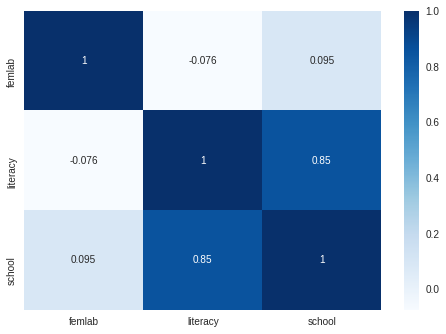

In [22]:
sns.heatmap(correlacion, cmap='Blues', annot=True)

La principal correlacion se da entre Tasa de Alfabetismo (literacy) y promedio de años de escolaridad (School).

**Desafio 4**

In [23]:
df_corr_region= df.loc[:,['region','femlab', 'literacy', 'school']]

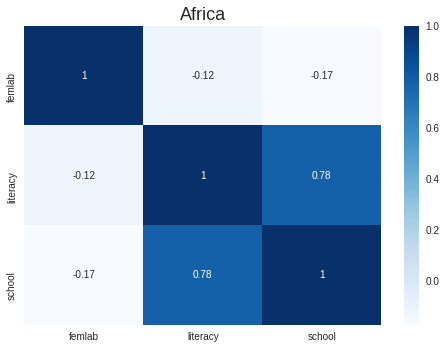

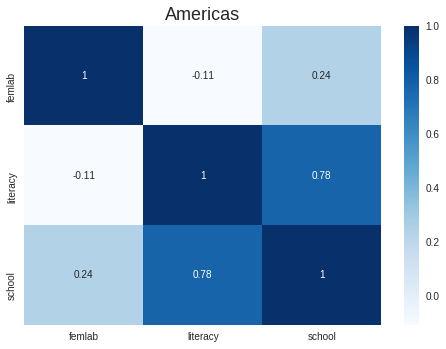

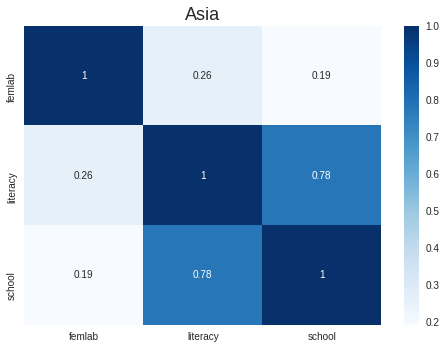

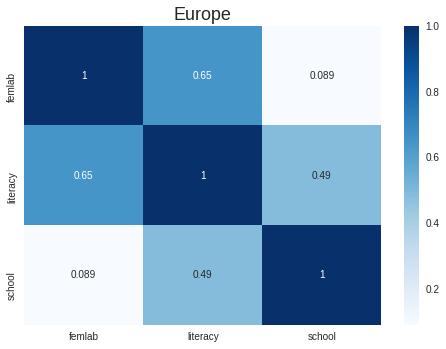

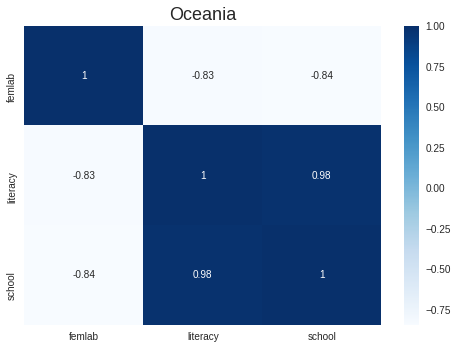

In [24]:
i=0
for region in df_corr_region['region'].unique():
    subset= df_corr_region[df_corr_region['region']==region].loc[:,['femlab', 'literacy', 'school']].dropna()
    plt.title('{0}'.format(region), fontsize=18)
    sns.heatmap(subset.corr(), cmap='Blues', annot = True)
    plt.show()
    i+=1

En Africa se observa una correlacion significativa entre Tasa de Alfabetismo (literacy) y Promedio de años de escolaridad (School).

En America se observa una correlacion significativa entre Tasa de Alfabetismo (literacy) y Promedio de años de escolaridad (School).


En Asia se observa una correlacion significativa entre Tasa de Alfabetismo (literacy) y Promedio de años de escolaridad (School).


En Europa se observa una correlacion significatica entre Tasa de Alfabetismo (literacy) y la Tasa entre Hombres y Mujeres en el Mercado Laboral (femlab).

En Oceania se observa una correlacion de 0,98 entre Tasa de Alfabetismo (literacy) y Promedio de años de escolaridad (School).

***Bonus***

Text(0.5, 1.0, 'Tasa de Alfabetismo vs Promedio de Años de escolaridad (Oceania)')

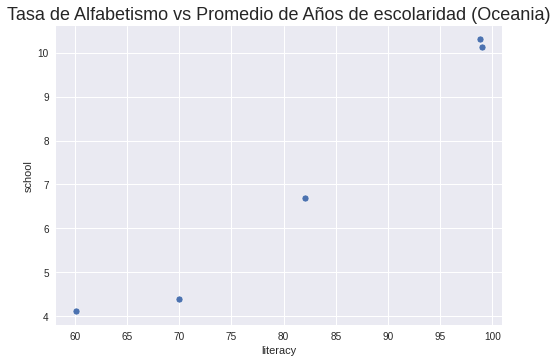

In [25]:
sns.scatterplot(data=df_corr_region, x= df_corr_region[df_corr_region['region']=='Oceania']['literacy'].dropna(), 
                y=df_corr_region[df_corr_region['region']=='Oceania']['school'].dropna())
plt.title('Tasa de Alfabetismo vs Promedio de Años de escolaridad (Oceania)', fontsize=18)

In [26]:
df_corr_region[df_corr_region['region']=='Oceania']['literacy'].dropna()

179    70.000000
188    60.099998
189    98.800003
191    99.000000
193    82.000000
Name: literacy, dtype: float64

Se observa una poca cantidad de datos usados para calcular la correlacion entre Tasa de Alfabetismo (literacy) y Promedio de Años de escolaridad (school).

Text(0.5, 1.0, 'Tasa de Alfabetismo vs Tasa entre Hombres y Mujeres en el Mercado Laboral (Europa)')

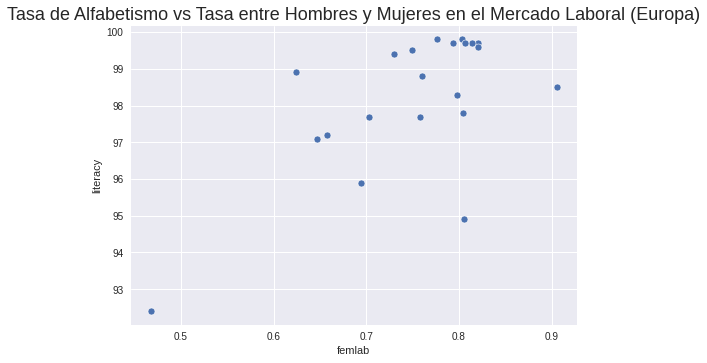

In [27]:
sns.scatterplot(data=df_corr_region, x= df_corr_region[df_corr_region['region']=='Europe']['femlab'].dropna(), 
                y=df_corr_region[df_corr_region['region']=='Europe']['literacy'].dropna())
plt.title('Tasa de Alfabetismo vs Tasa entre Hombres y Mujeres en el Mercado Laboral (Europa)', fontsize=18)

Text(0.5, 1.0, 'Tasa de Alfabetismo vs Promedio de Años de escolaridad (Asia)')

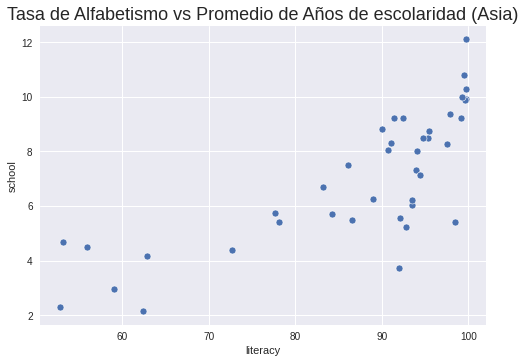

In [28]:
sns.scatterplot(data=df_corr_region, x= df_corr_region[df_corr_region['region']=='Asia']['literacy'].dropna(), 
                y=df_corr_region[df_corr_region['region']=='Asia']['school'].dropna())
plt.title('Tasa de Alfabetismo vs Promedio de Años de escolaridad (Asia)', fontsize=18)

Text(0.5, 1.0, 'Tasa de Alfabetismo vs Promedio de Años de escolaridad (America)')

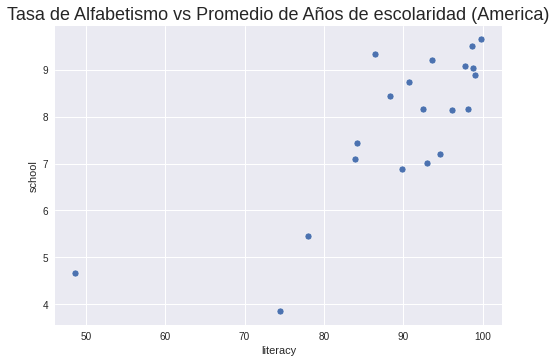

In [29]:
sns.scatterplot(data=df_corr_region, x= df_corr_region[df_corr_region['region']=='Americas']['literacy'].dropna(), 
                y=df_corr_region[df_corr_region['region']=='Americas']['school'].dropna())
plt.title('Tasa de Alfabetismo vs Promedio de Años de escolaridad (America)', fontsize=18)

Text(0.5, 1.0, 'Tasa de Alfabetismo vs Promedio de Años de escolaridad (Africa)')

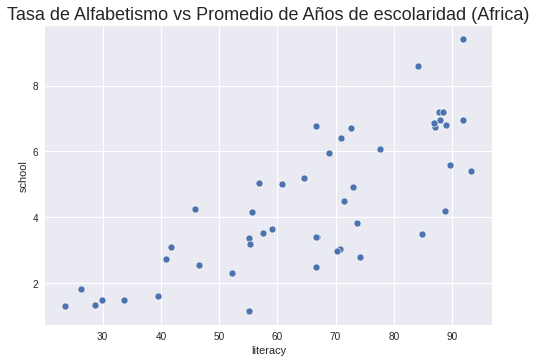

In [30]:
sns.scatterplot(data=df_corr_region, x= df_corr_region[df_corr_region['region']=='Africa']['literacy'].dropna(), 
                y=df_corr_region[df_corr_region['region']=='Africa']['school'].dropna())
plt.title('Tasa de Alfabetismo vs Promedio de Años de escolaridad (Africa)', fontsize=18)